## Intro To CNN with Tensorflow

Practise of writing algorithms to discover visual patterns

### Get Data

Images are from food 101 but we modified it to just pizza and steak

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-22 07:47:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   280MB/s    in 0.4s    

2022-07-22 07:47:31 (280 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect Data

A very crucial step at the begginning of the project is getting to know the data 

In [2]:
ls pizza_steak

test/  train/


In [3]:
ls pizza_steak\train

ls: cannot access 'pizza_steaktrain': No such file or directory


In [4]:
ls pizza_steak\train\steak

ls: cannot access 'pizza_steaktrainsteak': No such file or directory


In [5]:
import os

#walk through pizza steak directory and list the number of files in os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
#how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

##### To visualize, let's get class name programmatically

In [7]:
#get class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #create list of class name in subdirectory
print(class_names)

['pizza' 'steak']


### Let's Visualize our Images`

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #set target directory
    target_folder = target_dir + target_class
    
    #get random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    #read image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image Shape:{img.shape}")#show the shape of the image
    
    return img

Image Shape:(384, 512, 3)


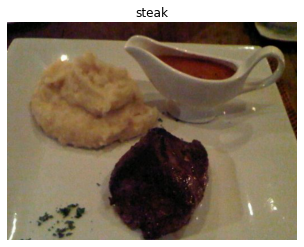

In [9]:
#view random image
img = view_random_image(target_dir = "pizza_steak/train/", 
                       target_class = "steak")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[133, 120, 130],
        [119, 105, 118],
        [107,  91, 104],
        ...,
        [ 60,  56,  21],
        [ 58,  53,  24],
        [ 56,  50,  28]],

       [[ 93,  81,  91],
        [ 83,  71,  81],
        [ 76,  62,  75],
        ...,
        [ 63,  58,  26],
        [ 62,  56,  30],
        [ 62,  56,  34]],

       [[ 49,  42,  50],
        [ 44,  37,  45],
        [ 42,  32,  41],
        ...,
        [ 65,  58,  32],
        [ 65,  59,  37],
        [ 65,  58,  39]],

       ...,

       [[134, 135, 101],
        [147, 150, 119],
        [148, 150, 126],
        ...,
        [137, 136, 106],
        [138, 139, 108],
        [139, 140, 109]],

       [[131, 135, 100],
        [146, 150, 117],
        [154, 157, 130],
        ...,
        [137, 137, 103],
        [137, 138, 104],
        [138, 139, 105]],

       [[143, 147, 110],
        [149, 153, 120],
        [161, 164, 137],
        ...,
        [137, 137, 10

In [11]:
#View Image Shape
img.shape #returns width, height, color channels

(384, 512, 3)

In [12]:
#Get all the pixel values between 0 and 1
img/255

array([[[0.52156863, 0.47058824, 0.50980392],
        [0.46666667, 0.41176471, 0.4627451 ],
        [0.41960784, 0.35686275, 0.40784314],
        ...,
        [0.23529412, 0.21960784, 0.08235294],
        [0.22745098, 0.20784314, 0.09411765],
        [0.21960784, 0.19607843, 0.10980392]],

       [[0.36470588, 0.31764706, 0.35686275],
        [0.3254902 , 0.27843137, 0.31764706],
        [0.29803922, 0.24313725, 0.29411765],
        ...,
        [0.24705882, 0.22745098, 0.10196078],
        [0.24313725, 0.21960784, 0.11764706],
        [0.24313725, 0.21960784, 0.13333333]],

       [[0.19215686, 0.16470588, 0.19607843],
        [0.17254902, 0.14509804, 0.17647059],
        [0.16470588, 0.1254902 , 0.16078431],
        ...,
        [0.25490196, 0.22745098, 0.1254902 ],
        [0.25490196, 0.23137255, 0.14509804],
        [0.25490196, 0.22745098, 0.15294118]],

       ...,

       [[0.5254902 , 0.52941176, 0.39607843],
        [0.57647059, 0.58823529, 0.46666667],
        [0.58039216, 0

### End to End example

Convolutional neural network to find patterns in our images

* Load our Images
* Preprocess our Images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#set seed
tf.random.set_seed(42)

#preprocess data (get all pixel values between 0 and 1, normalization / scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

#Building a CNN Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile CNN
model1.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#fit model
history1 = model1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 101s 2s/step - loss: 0.5651 - accuracy: 0.6973 - val_loss: 0.4015 - val_accuracy: 0.8300
Epoch 2/5
28/47 [================>.............] - ETA: 33s - loss: 0.4233 - accuracy: 0.8047

### Same old model but on images

In [ ]:
#set seed
tf.random.set_seed(42)

#create a model to replicate 
model2 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4, activation = "relu"),
                              tf.keras.layers.Dense(4, activation = "relu"),
                              tf.keras.layers.Dense(1, activation = "sigmoid")
])

model2.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics=["accuracy"])

model2.fit(train_data,
           epochs = 5,
           steps_per_epoch=len(train_data),
           validation_data = valid_data,
           validation_steps=len(valid_data)
           )

In [ ]:
#get summary of model2
model2.summary()

In [ ]:
#set seed
tf.random.set_seed(42)

#model
model3 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
                              tf.keras.layers.Dense(100, activation = "relu"),
                              tf.keras.layers.Dense(100, activation = "relu"),
                              tf.keras.layers.Dense(100, activation = "relu"),
                              tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile the model
model3.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit model
history3 = model3.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

In [ ]:
#get summary
model3.summary()

#### Binary Classification

1. Become one with data
2. Pre Process the data (Prepare it for the model, main step - scaling / normalizing)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat baseline)
7. Repeat until satisfied

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")